# Winter 2025 Week 7

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import all the functions from the Utility_functions.py file
from Utility_functions import *

## Single Period Random Cash flow

### Review of Probability
Let $X$ be a discrete random variable with possible values $x_1,\ldots, x_n$. We define its **expected value**
$$E[X] = \sum_1^n x_i P(X = x_i)$$
and **variance**
$$\text{Var}(X) = E[(X-E[X])^2] = E[X^2] - E[X]^2$$

They have the following properties
$$E[aX+bY+c] = aE[X]+bE[Y]+c$$
$$\text{Var}(aX+b) = a^2\text{Var}(X)$$

Let $X, Y$ be two random variables, we define the **covariance of** $X, Y$ to be 
$$\text{Cov}(X, Y) = E[(X-E[X])(Y-E[Y])] = E[XY] - E[X]E[Y]$$

The covariance is a bilinear positive semi-definite symmetric form (i.e, it is an inner product), satisfying the properties 
$$\text{Cov}(X, Y) = \text{Cov}(Y, X)$$
$$\text{Cov}(\sum_1^n X_i, \sum_1^nX_i) = \sum_{i,j}\text{Cov}(X_i, X_j)$$

By Cauchy-Schwarz inequality, we can show that 
$$|\text{Cov}(X,Y)|\leq \sqrt{Var(X)}\sqrt{Var(Y)}$$
and the equality holds if $Y$ is a scalar multiple of $X$. 

We say two random variables are **uncorrelated** if their covariance is zero. In particular, independent random variables are uncorrelated. However, there are random variables which are dependent, but uncorrelated. 

We define the **Pearson correlation coefficient** as 
$$\rho_{X,Y} = \frac{Cov(X,Y)}{\sqrt{Var(X)}\sqrt{Var(Y)}}.$$
Then we have $\rho_{X,Y}\in [-1, 1]$, and $\rho_{X,Y} = \pm 1$ if and only if $X=\pm c\cdot Y$ where $c$ is a positive number.

By the bilinearlity of covariance, we can show that 
$$\text{Var}(X+Y) = \text{Cov}(X+Y, X+Y) = \text{Var}(X)+\text{Var}(Y) + 2\text{Cov}(X, Y)$$

### Total return and return rate
We consider a single-period investment, which consists of initial investment $X_0$, and final payment $X_1$. We define the **total return** as 
$$R = \frac{X_1}{X_0}$$
and the **return rate**
$$r = \frac{X_1-X_0}{X_0} = R-1$$

Consider a portfolio consisting of $n$ investments, where the initial investment are $X_{0, i}$ and the final payment is $X_{1, i}$. Let $R_i$ and $r_i$ be the total return and return rate of each investment, and $X_0 = \sum_1^n X_{0, i}, X_n = \sum_1^n X_{1, i}$. Let $R, r$ be the total return, and retun rate of this portfolio. Let $w_i = \frac{X_{0,i}}{X_0}$ be the weight of each investment. Then, we have
$$R = \frac{\sum_1^n X_{1, i}}{X_0} = \frac{\sum_1^n w_iX_0R_i}{X_0} = \sum_1^n w_i R_i$$
$$r = R-1 = \sum_1^n w_iR_i - \sum_1^n w_i = \sum_1^n w_i (R-1) = \sum_1^n w_i r_i$$

In summary, the total return and return rate of a portfolio is a weighted sum of the total return and return rate of each asset in the portfolio, where the weight is the relative cost in the portfolio. 

**Example**
Let $X, Y$ be independent normal distribution with mean $0$ and variance $1$. Show that $(X, \rho X+\sqrt{1-\rho^2}Y)$ has correlation coefficient $\rho$.

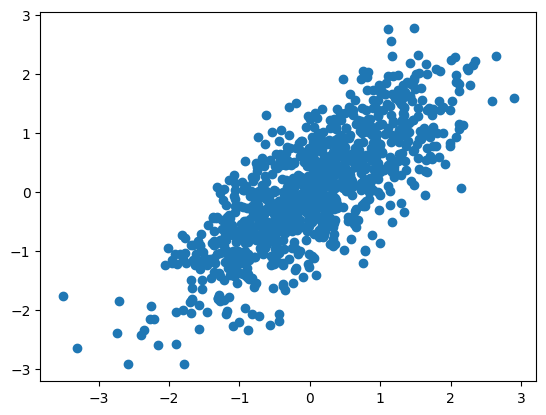

[[1.         0.77856373]
 [0.77856373 1.        ]]
[[ 1.         -0.02426497]
 [-0.02426497  1.        ]]


In [7]:
n = 1000
rho = 0.8
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
Z = rho * X + np.sqrt(1-rho**2) * Y
plt.scatter(X, Z)
plt.show()
print(np.corrcoef(X, Z))
print(np.corrcoef(X, Y))

## Mean-Variance Portfolio theory

- Now the cash flow is not deterministic, like stock.
- Instead of looking at a single stock, we look at "a lot" of stocks in the market.
- Target: Maximize 'Profit' and Minimize the 'Risk' at the same time.

### What is 'Profit'?
If we look at the single period return of a single stock, it is not fixed. In fact, you can regard it as a random variable. So the average return, is given by its **Mean**.

### What is 'Risk'?
For a given stock, although its average return, or, **Mean** can be very large. But maybe at the same time, it may have a larger change to have very small, even very negative, return. As a risk netural or risk aversion investor, you want somehow steady return with small risk, then the value of the random variable should be more 'Concentrate' around its mean. So the 'Risk' is given by its **Variance**.

## Example: Simple linear relation

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/var/folders/l_/txq0vh11623_5lrnfw_cpmsh0000gn/T/ipykernel_2585/2006982596.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'Sampled Linear Relation Model with variance \sigma^2 = {sigma**2}')


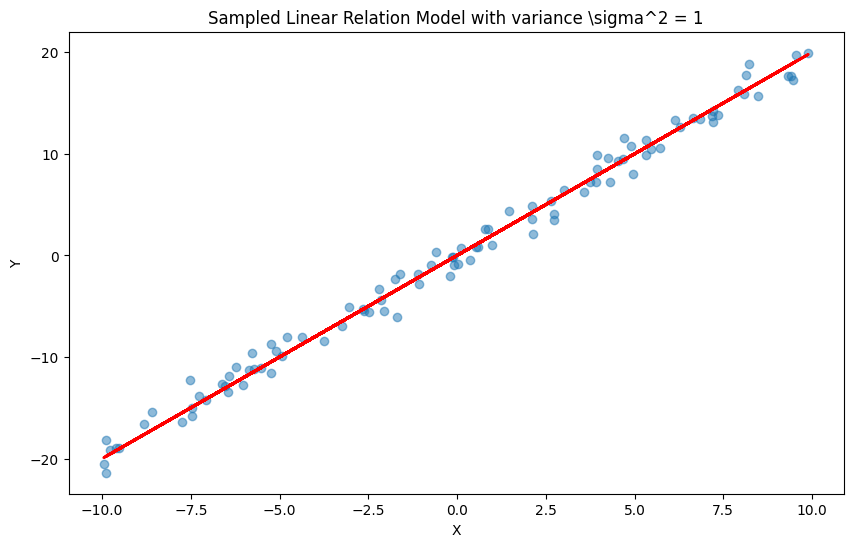

In [11]:
# Plot the linear regression model
plt.figure(figsize=(10, 6))
n = 100
beta = 2
sigma = 1
X = np.random.uniform(-10, 10, n)
Y = beta * X + np.random.normal(0, sigma, n)
plt.scatter(X, Y, alpha=0.5)
plt.plot(X, beta * X, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Sampled Linear Relation Model with variance \sigma^2 = {sigma**2}')
plt.show()


Now, our job is clear. Mathematically, we need to **Maximize the mean** of the portfolio and **Minimize the variance**.

## Exercise 6.4
(Two stocks) Two stocks are available. The corresponding expected rates of return are $\overline{r_1}$ and $\overline{r_2}$; the corresponding variances and covariances are $\sigma_1^2$, $\sigma_2^2$, and $\sigma_{12}$. What percentages of total investment should be invested in each of the two stocks to minimize the total variance of the rate of return of the resulting portfolio? What is the mean rate of return of this portfolio?

### Solution:
We can take a look at the efficient frontier of two stocks.

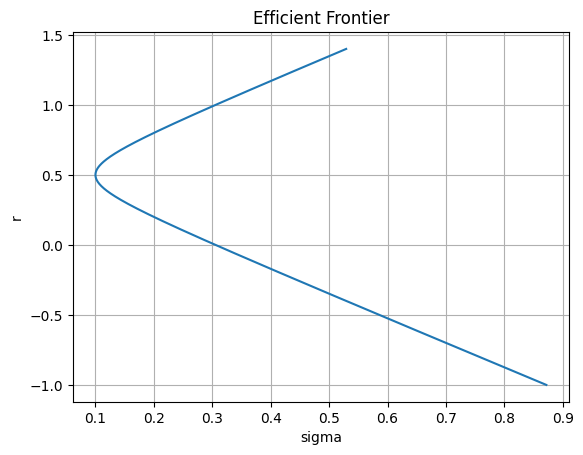

In [12]:
sigma1 = 0.1
sigma2 = 0.2
r1 = 0.5
r2 = 0.2
rho = 0.5
sigma12 = rho * sigma1 * sigma2

def r(alpha):
    return alpha * r1 + (1 - alpha) * r2

def sigma(alpha):
    return np.sqrt(alpha**2 * sigma1**2 + (1-alpha)**2 * sigma2**2 + 2 * alpha * (1-alpha) * sigma12)

alpha = np.linspace(-4, 4, 1000)

rlist = r(alpha)
sigmalist = sigma(alpha)

plt.plot(sigmalist, rlist)
plt.xlabel('sigma')
plt.ylabel('r')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()


Mathematically, this can be solved using the following:
Suppose the weight for stock $1$ is $\alpha$, and the weights for stock $2$ is $1-\alpha$. We want to minimize the function 
$$\alpha^2\sigma_1^2+(1-\alpha)^2\sigma_2^2+2\alpha(1-\alpha)\sigma_{12}$$
This is a concave up quadratic function in $\alpha$. It is minimized when the derivative is zero. The derivative of the above function is 
$$2\alpha\sigma_1^2-2(1-\alpha)\sigma_2^2+(2-4\alpha)\sigma_{12}$$
The above function equals $0$ when $\alpha = \frac{\sigma_2^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}$, and the corresponding $1-\alpha$ is $1- \alpha = \frac{\sigma_1^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}$. 

Therefore, to minimize the variance of the rate of return of this portfolio, the weights for stock $1$ and stock $2$ are $\frac{\sigma_2^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}$ and $\frac{\sigma_1^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}$ respectively. The expected rate of return of this portfolio is $\frac{\sigma_2^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}\overline{r_1} + \frac{\sigma_1^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}\overline{r_2}$

## The Markowitz Model for finding the minimum-variance set
Consider a portfolio in $n$ assets with expected return $\overline{r_i}$ and covariance $\sigma_{ij}$. We would like to find the weights $w_i$ for each asset to 
$$\text{minimize } \frac{1}{2}\sum_{i,j = 1}^n w_iw_j \sigma_{ij}$$
$$ \begin{align*} \text{subject to } & \sum_1^n w_i\overline{r_i} = \overline{r} \\ &\sum_1^n w_i = 1\end{align*}$$

By the Lagrange Multipler methods, we need to solve the equations 
$$\begin{align*}\sum_{j = 1}^n \sigma_{ij}w_j-\lambda\overline{r_i}-\mu &= 0 \;\;\;\;\text{for all } i\\ \sum_1^n w_i\overline{r_i} &= \overline{r} \\ \sum_1^n w_i &= 1\end{align*}$$